In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

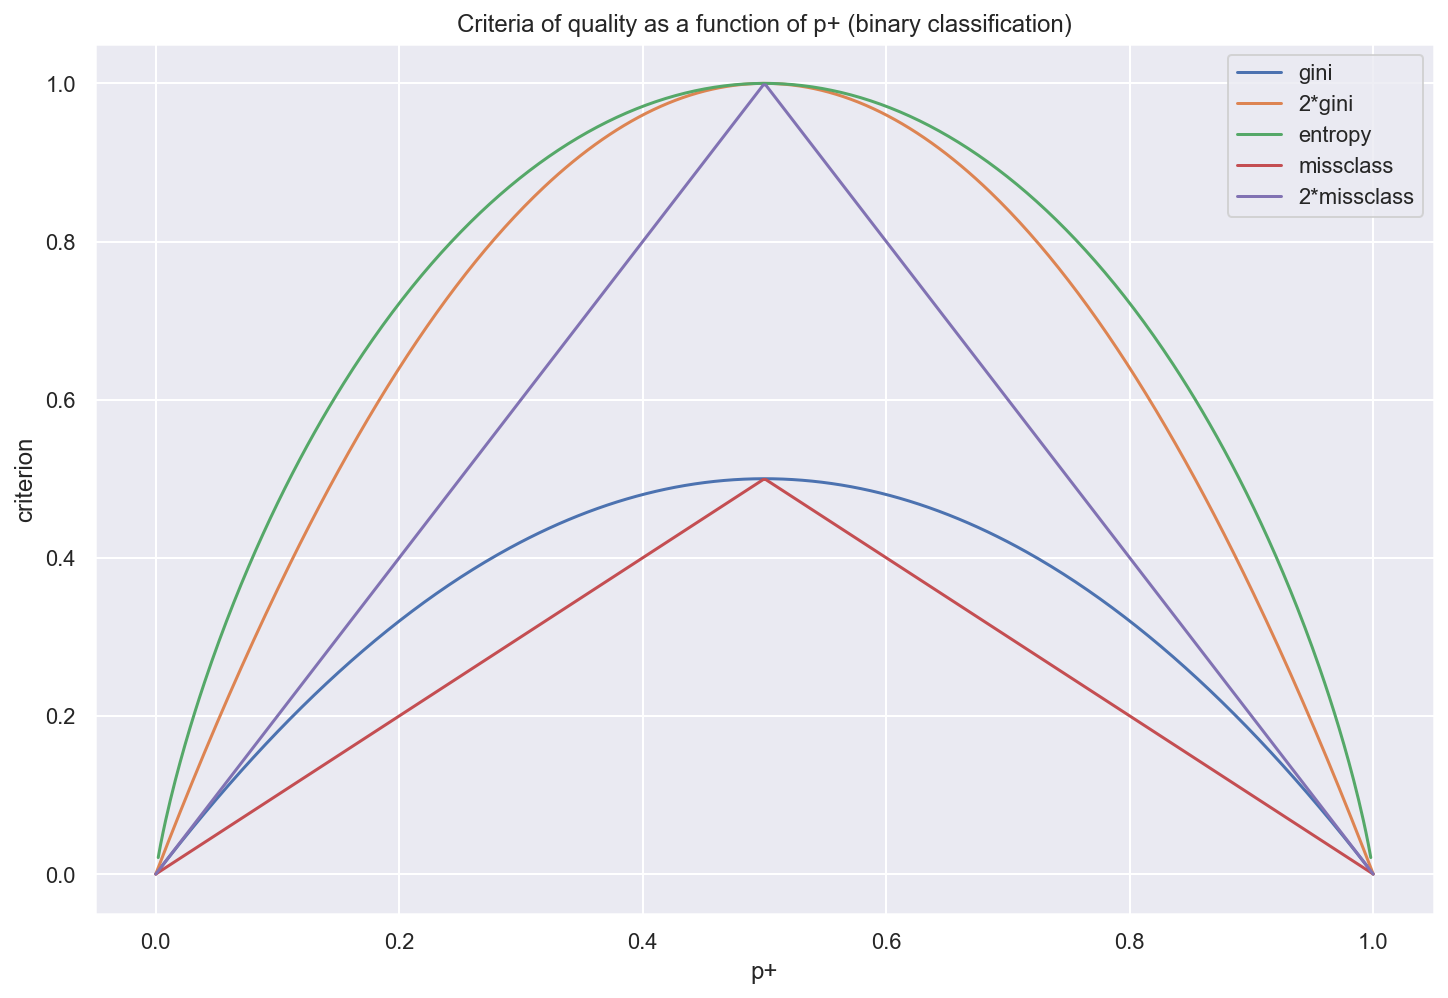

In [2]:
plt.figure(figsize=(12,8))
xx = np.linspace(0, 1, 500)
plt.plot(xx, [2 * x * (1 - x) for x in xx], label = 'gini')
plt.plot(xx, [4 * x * (1 - x) for x in xx], label="2*gini")
plt.plot(xx, [-x * np.log2(x) - (1 - x) * np.log2(1 - x) for x in xx], label="entropy")
plt.plot(xx, [1 - max(x, 1 - x) for x in xx], label="missclass")
plt.plot(xx, [2 - 2 * max(x, 1 - x) for x in xx], label="2*missclass")
plt.xlabel("p+")
plt.ylabel("criterion")
plt.title("Criteria of quality as a function of p+ (binary classification)")
plt.legend();

In [3]:
np.random.seed(17)
train_data = np.random.normal(size=(100,2))
train_labels = np.zeros(100)

train_data = np.r_[train_data, np.random.normal(size = (100, 2), loc = 2)]
train_labels = np.r_[train_labels, np.ones(100)]

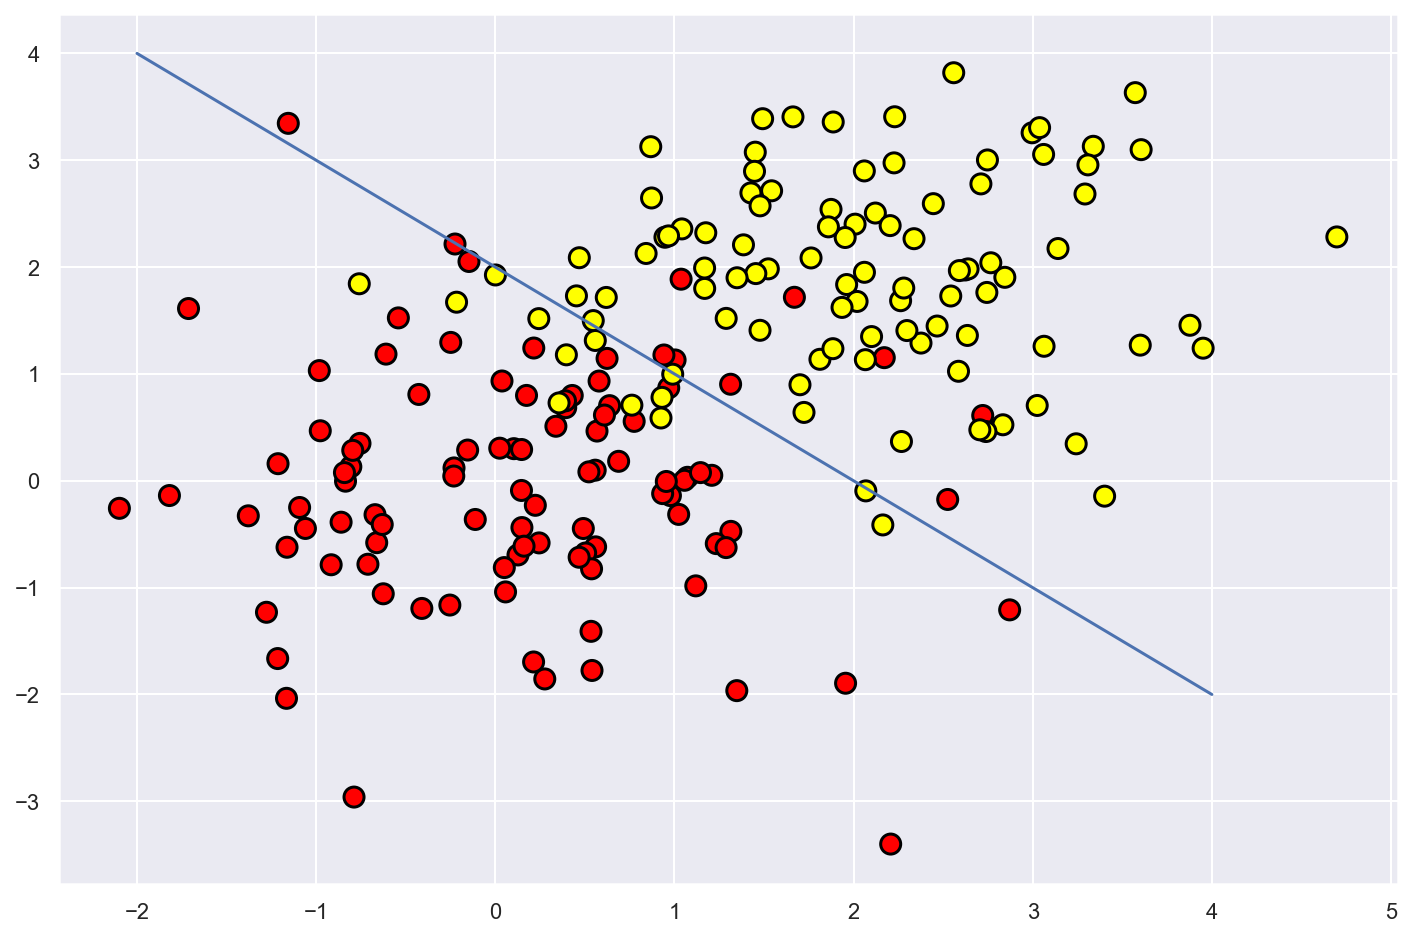

In [4]:
plt.figure(figsize = (12, 8))
plt.scatter(train_data[:, 0], train_data[:, 1],c = train_labels, s = 100, cmap='autumn', edgecolors='black', linewidths=1.5)
plt.plot(np.arange(-2, 5), np.arange(4, -3, -1))

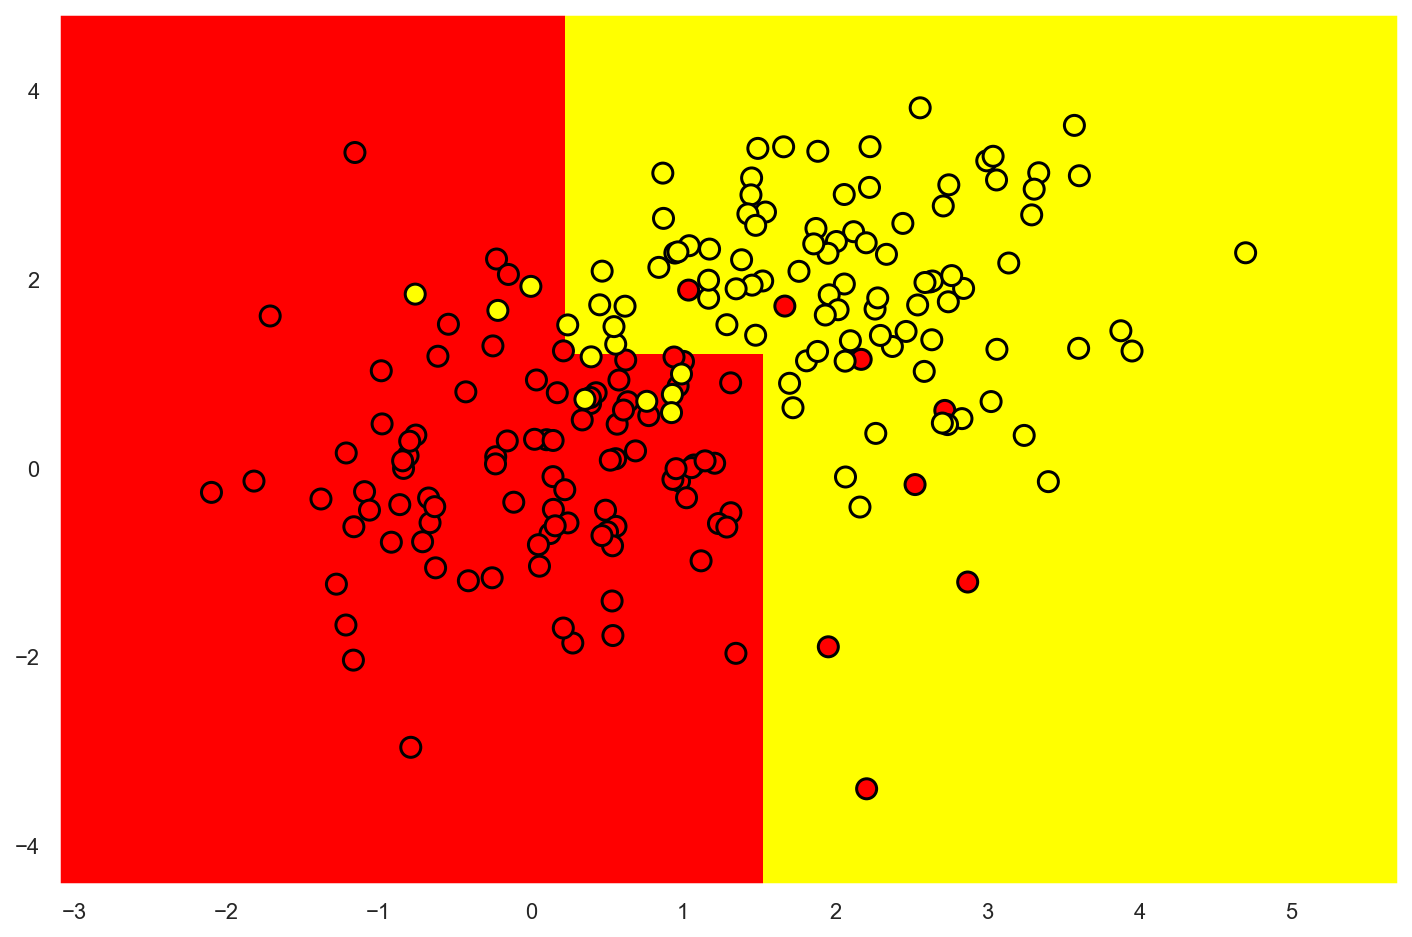

In [153]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=17)
clf_tree.fit(train_data, train_labels)

xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize = (12, 8))
plt.pcolor(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1],c = train_labels, s = 100, cmap='autumn', edgecolors='black', linewidths=1.5)


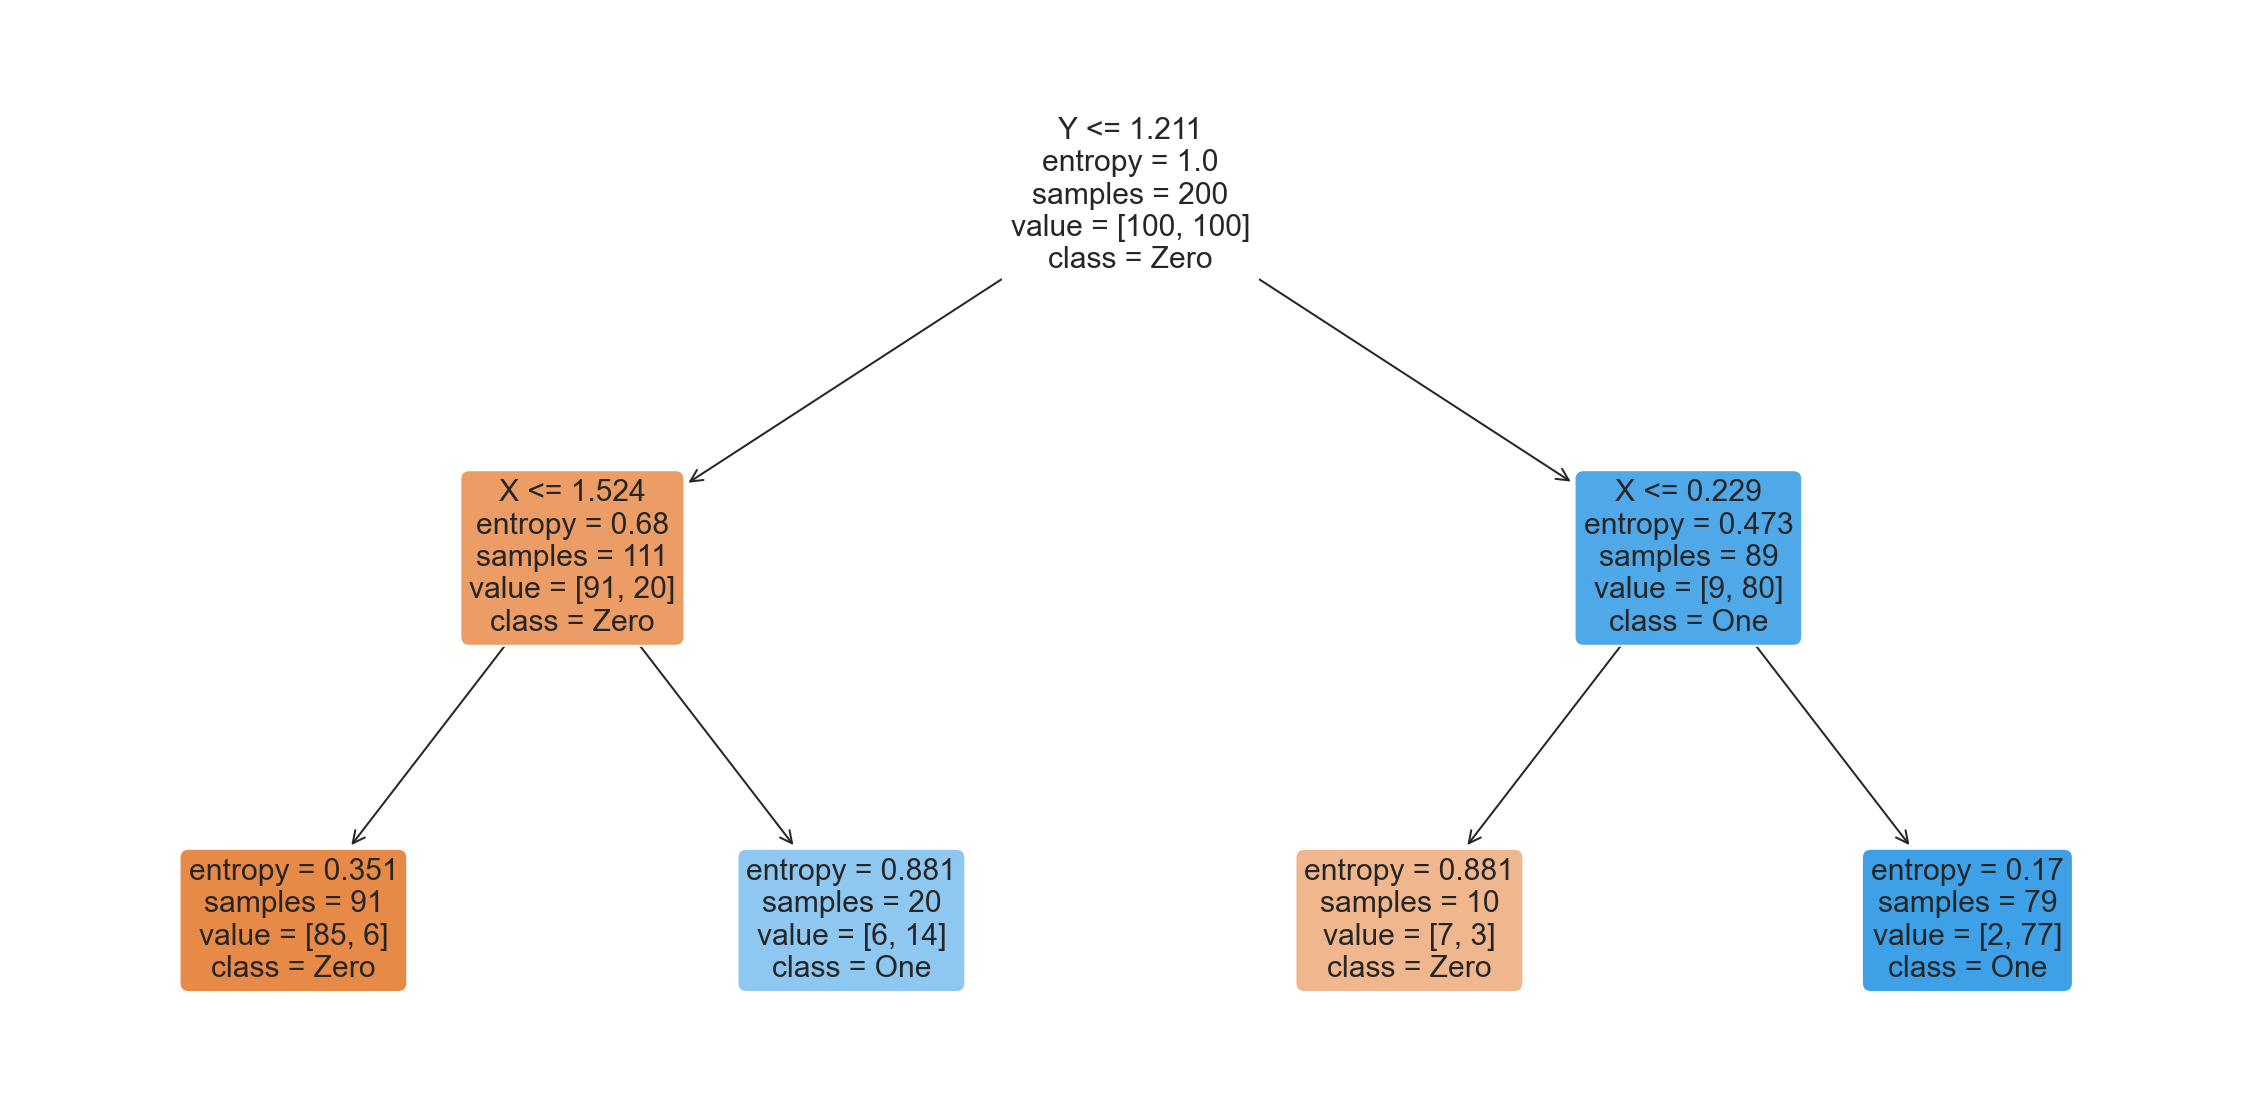

In [11]:
plt.figure(figsize=(20, 10))
tree.plot_tree(clf_tree, 
               feature_names=['X', 'Y'], 
               class_names=['Zero', 'One'], 
               filled=True,
               rounded=True,
               fontsize = 15)
plt.show()

In [12]:
data = pd.DataFrame(
    {
        "Age": [17, 64, 18, 20, 38, 49, 55, 25, 29, 31, 33],
        "Loan Default": [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1],
    }
)
data.head()

Age  Loan Default
0   17             1
1   64             0
2   18             1
3   20             0
4   38             1

In [13]:
data.sort_values("Age")

Age  Loan Default
0    17             1
2    18             1
3    20             0
7    25             1
8    29             1
9    31             0
10   33             1
4    38             1
5    49             0
6    55             0
1    64             0

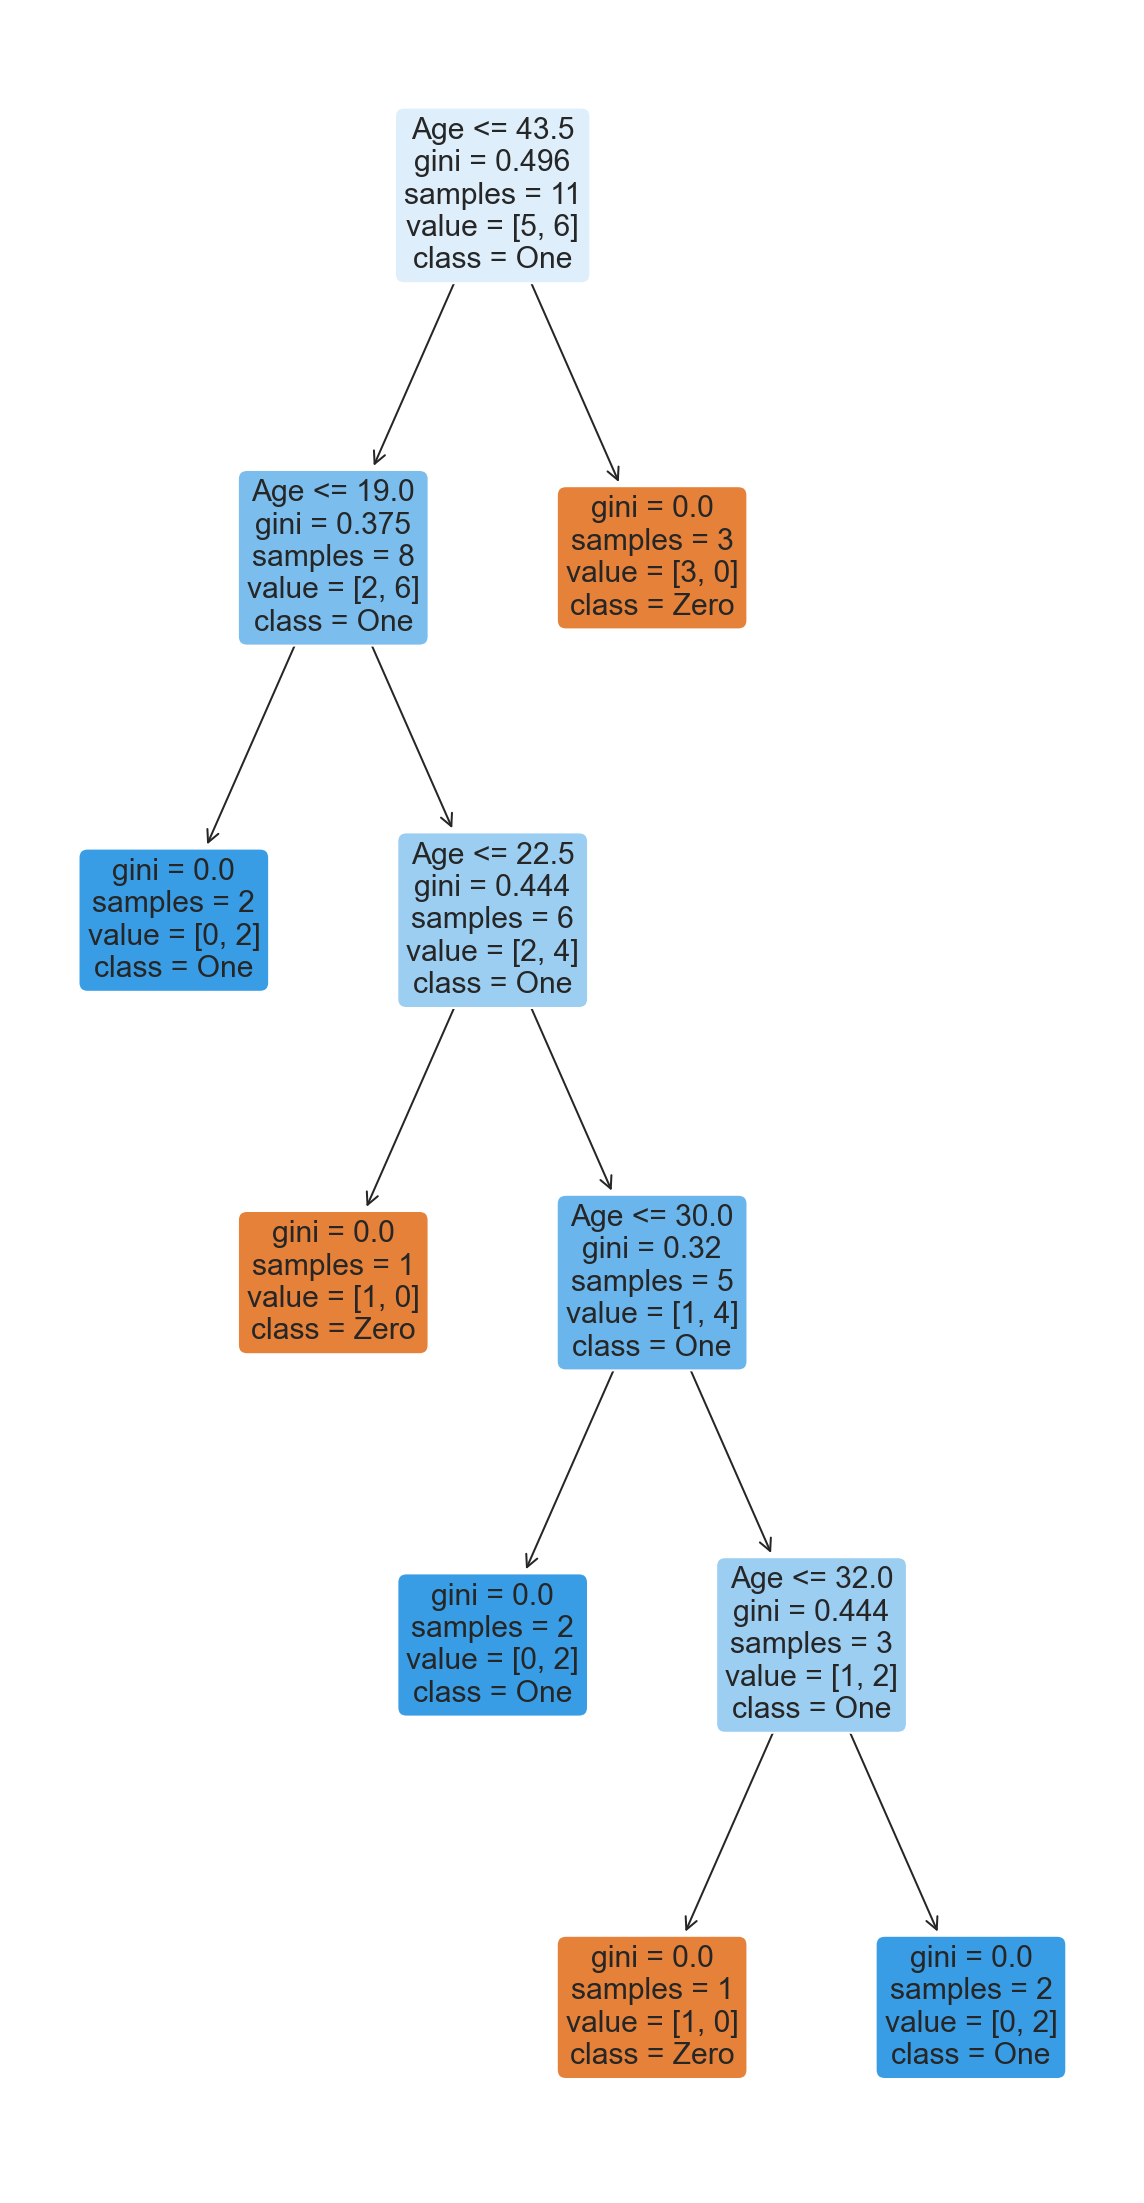

In [21]:
age_tree = DecisionTreeClassifier(random_state=17)
age_tree.fit(data["Age"].values.reshape(-1, 1), data["Loan Default"].values)
plt.figure(figsize=(10, 20))
tree.plot_tree(age_tree, 
               feature_names=['Age'], 
               class_names=['Zero', 'One'], 
               filled=True,
               rounded=True,
               fontsize = 15)
plt.show()

In [22]:
data2 = pd.DataFrame(
    {
        "Age": [17, 64, 18, 20, 38, 49, 55, 25, 29, 31, 33],
        "Salary": [25, 80, 22, 36, 37, 59, 74, 70, 33, 102, 88],
        "Loan Default": [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1],
    }
)
data2

Age  Salary  Loan Default
0    17      25             1
1    64      80             0
2    18      22             1
3    20      36             0
4    38      37             1
5    49      59             0
6    55      74             0
7    25      70             1
8    29      33             1
9    31     102             0
10   33      88             1

In [23]:
data2.sort_values("Age")

Age  Salary  Loan Default
0    17      25             1
2    18      22             1
3    20      36             0
7    25      70             1
8    29      33             1
9    31     102             0
10   33      88             1
4    38      37             1
5    49      59             0
6    55      74             0
1    64      80             0

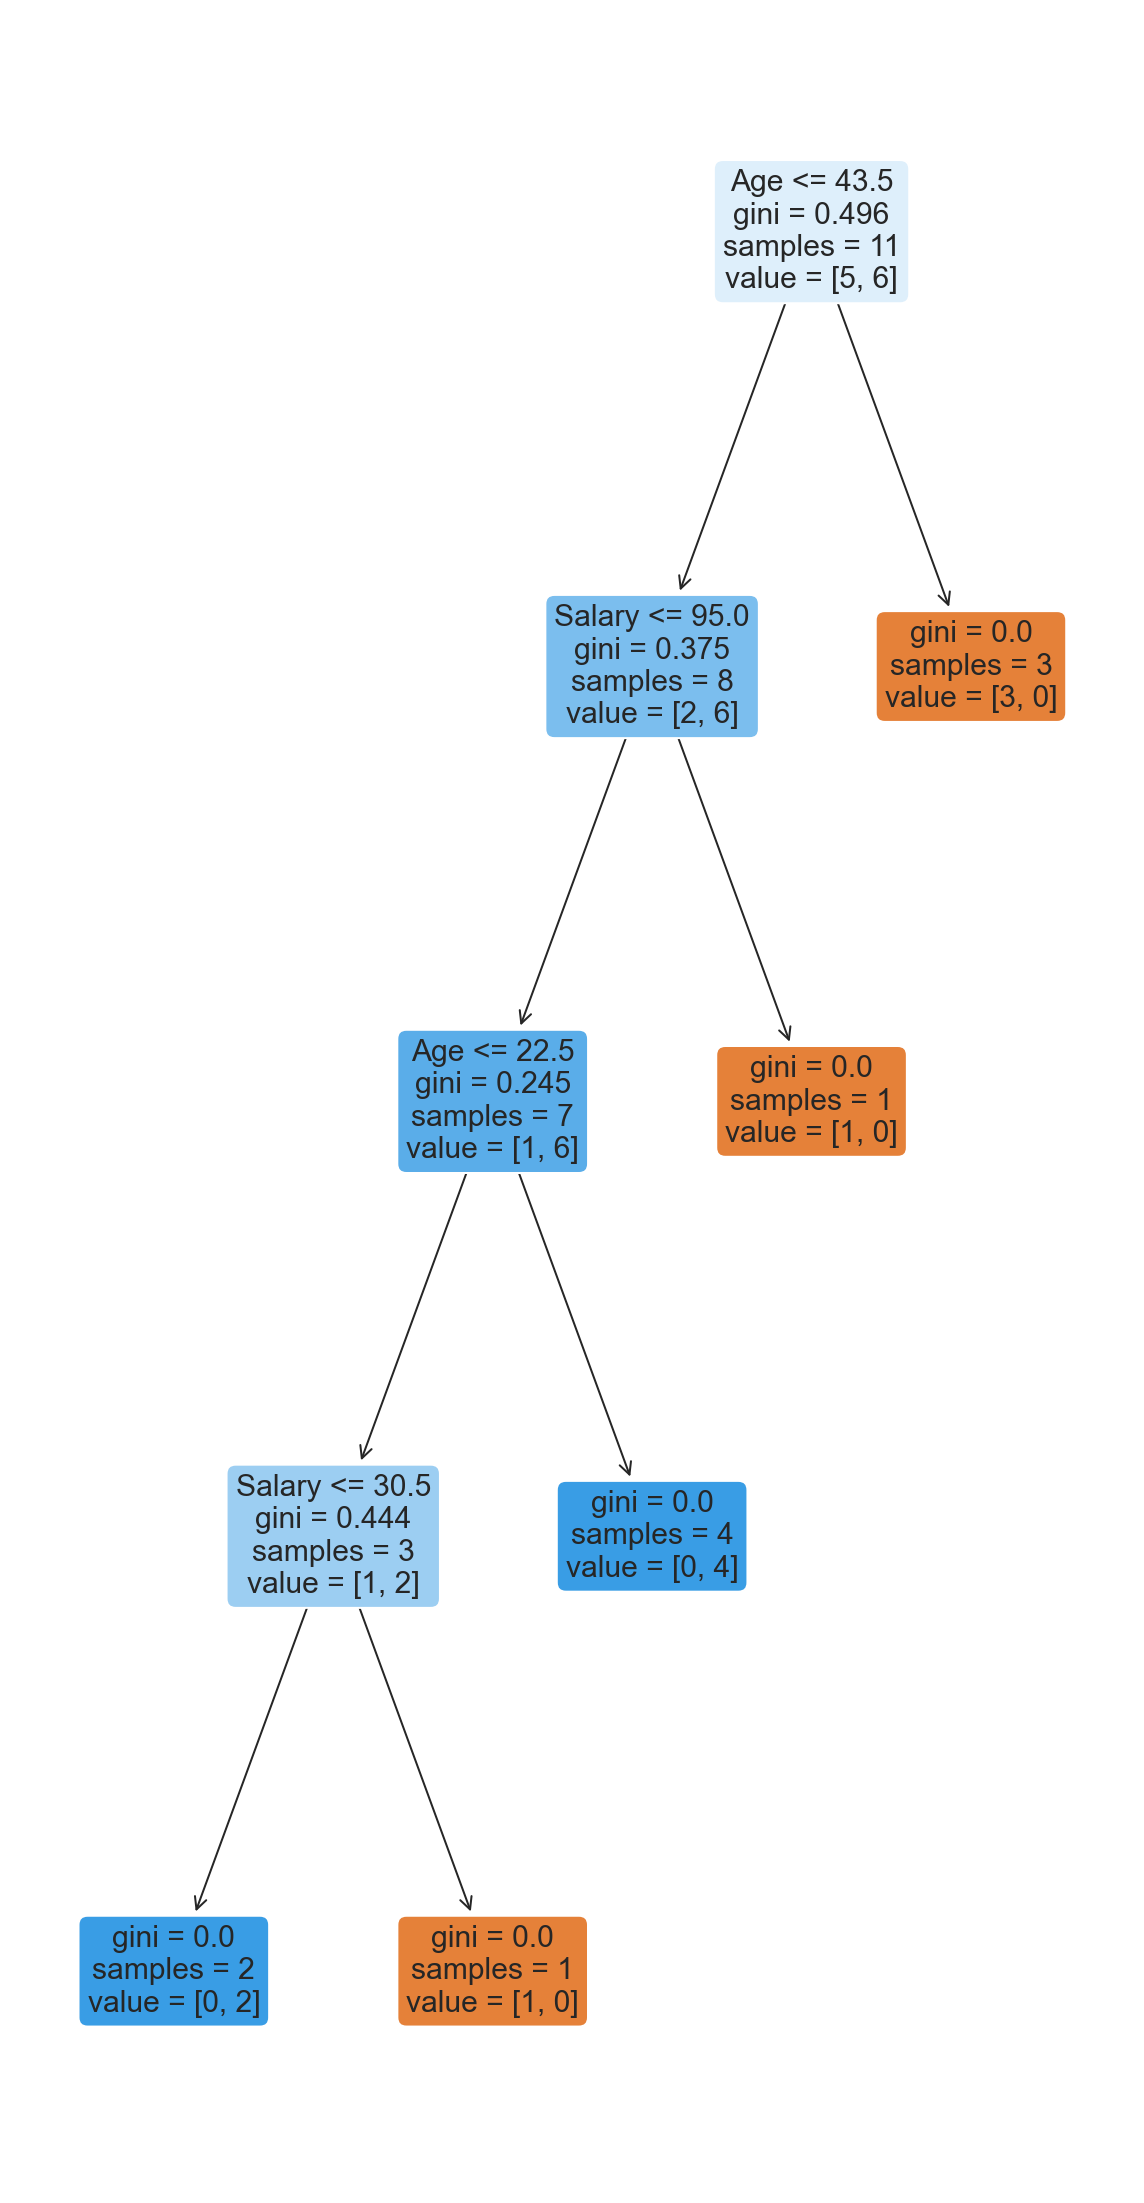

In [43]:
age_sal_tree = DecisionTreeClassifier(random_state=17)
age_sal_tree.fit(data2[["Age", "Salary"]].values, data2["Loan Default"].values)
plt.figure(figsize=(10, 20))
tree.plot_tree(age_sal_tree, 
               feature_names=data2.columns.to_list()[:2],
               filled=True, rounded=True, fontsize=15);

In [39]:
data2.columns.to_list()[:2]

['Age', 'Salary']

In [56]:
n_train = 150
n_test = 1000
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-(x ** 2)) + 1.5 * np.exp(-((x - 2) ** 2))

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = f(X) + np.random.normal(0, noise, n_samples)
    X = X.reshape(-1, 1)
    return X, y

In [58]:
X_train, y_train = generate(n_train, noise)
X_test, y_test = generate(n_test, noise)

In [61]:
from sklearn.tree import DecisionTreeRegressor
reg_tree = DecisionTreeRegressor(max_depth=5, random_state=17)
reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

Text(0.5, 1.0, 'Decision tree regressor, MSE = 0.02')

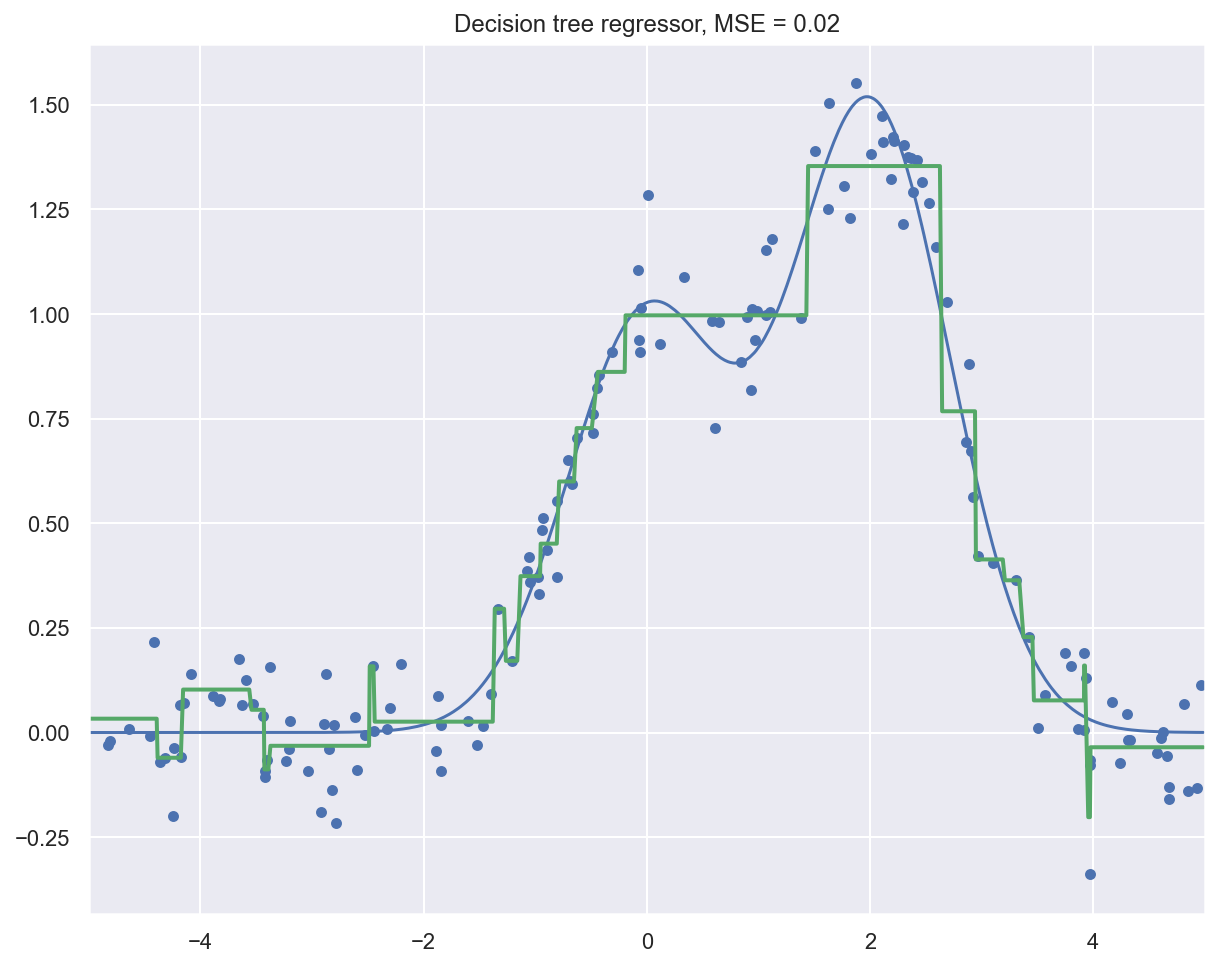

In [65]:
plt.figure(figsize=(10, 8))
plt.plot(X_test, f(X_test), c = 'b')
plt.scatter(X_train, y_train, c = 'b', s = 20)
plt.plot(X_test, reg_tree_pred, c = 'g', lw = 2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % (sum((y_test - reg_tree_pred) ** 2) / n_test))

Text(0.5, 1.0, 'Decision tree regressor, MSE = 0.02')

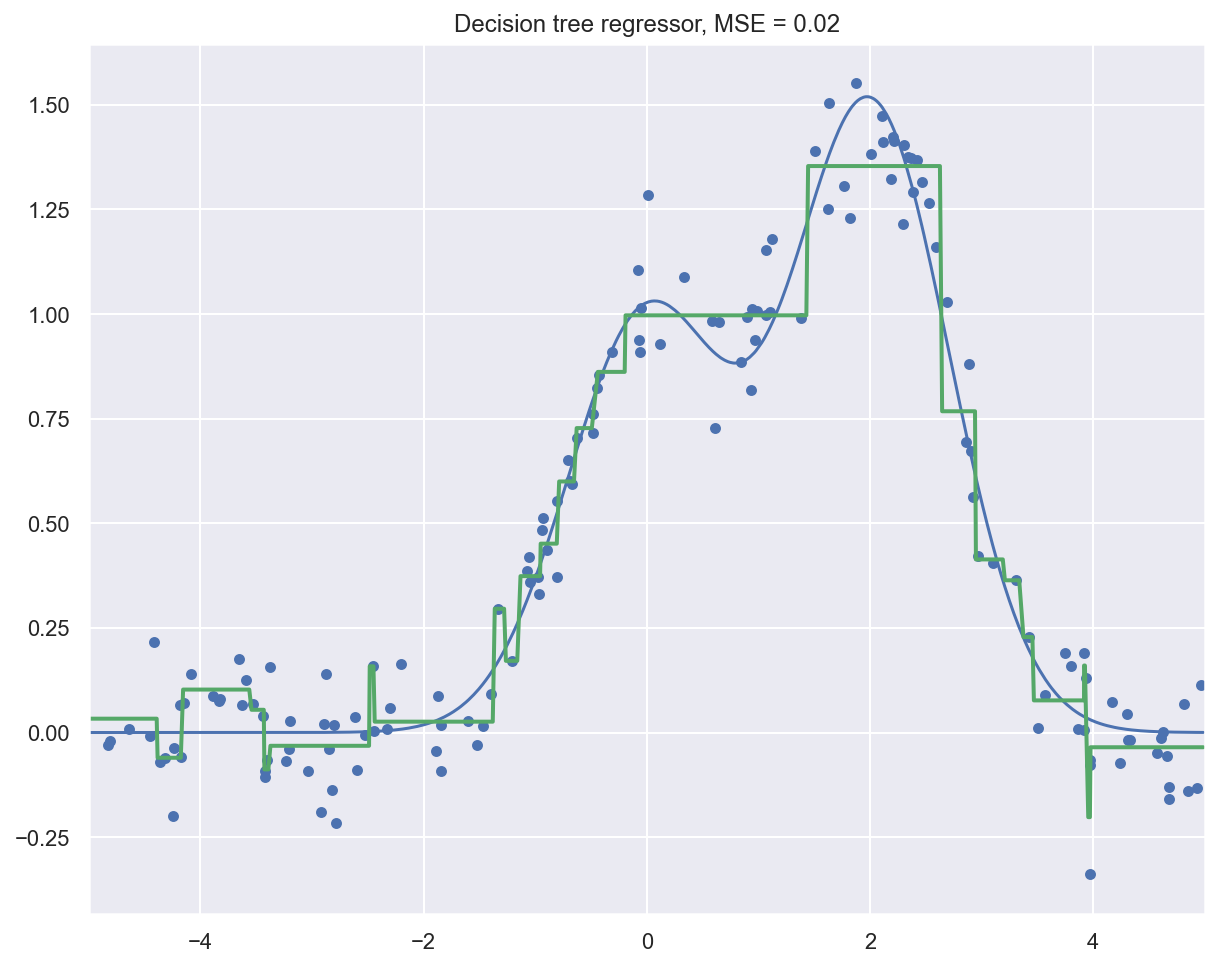

In [67]:
plt.figure(figsize=(10, 8))
plt.plot(X_test, f(X_test), c = 'b')
plt.scatter(X_train, y_train, c = 'b', s = 20)
plt.plot(X_test, reg_tree_pred, c = 'g', lw = 2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % np.std(y_test - reg_tree_pred) ** 2)

In [68]:
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"

In [71]:
df = pd.read_csv(DATA_PATH + 'telecom_churn.csv')

df['International plan'] = pd.factorize(df['International plan'])[0]
df['Voice mail plan'] = pd.factorize(df['Voice mail plan'])[0]
df['Churn'] = df['Churn'].astype('int')
states = df['State']
y = df['Churn']
df.drop(['State', 'Churn'], axis=1, inplace=True)
df.head()

Account length  Area code  International plan  Voice mail plan  \
0             128        415                   0                0   
1             107        415                   0                0   
2             137        415                   0                1   
3              84        408                   1                1   
4              75        415                   1                1   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  
0                       1  
1                       1  
2                       0  
3                       2  
4                       3

0       KS
1       OH
2       NJ
3       OH
4       OK
        ..
3328    AZ
3329    WV
3330    RI
3331    CT
3332    TN
Name: State, Length: 3333, dtype: object

In [73]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

X_train, X_holdout, y_train, y_holdout = train_test_split(df.values, y, test_size=0.3, random_state=17)

tre = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)

tre.fit(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.fit_transform(X_holdout)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=10)

In [74]:
from sklearn.metrics import accuracy_score
tree_pred = tre.predict(X_holdout)
knn_pred = knn.predict(X_holdout_scaled)


In [77]:
print(f"Tree accuracy = {accuracy_score(tree_pred, y_holdout)}")
print(f"KNN accuracy = {accuracy_score(knn_pred, y_holdout)}")

Tree accuracy = 0.94
KNN accuracy = 0.886


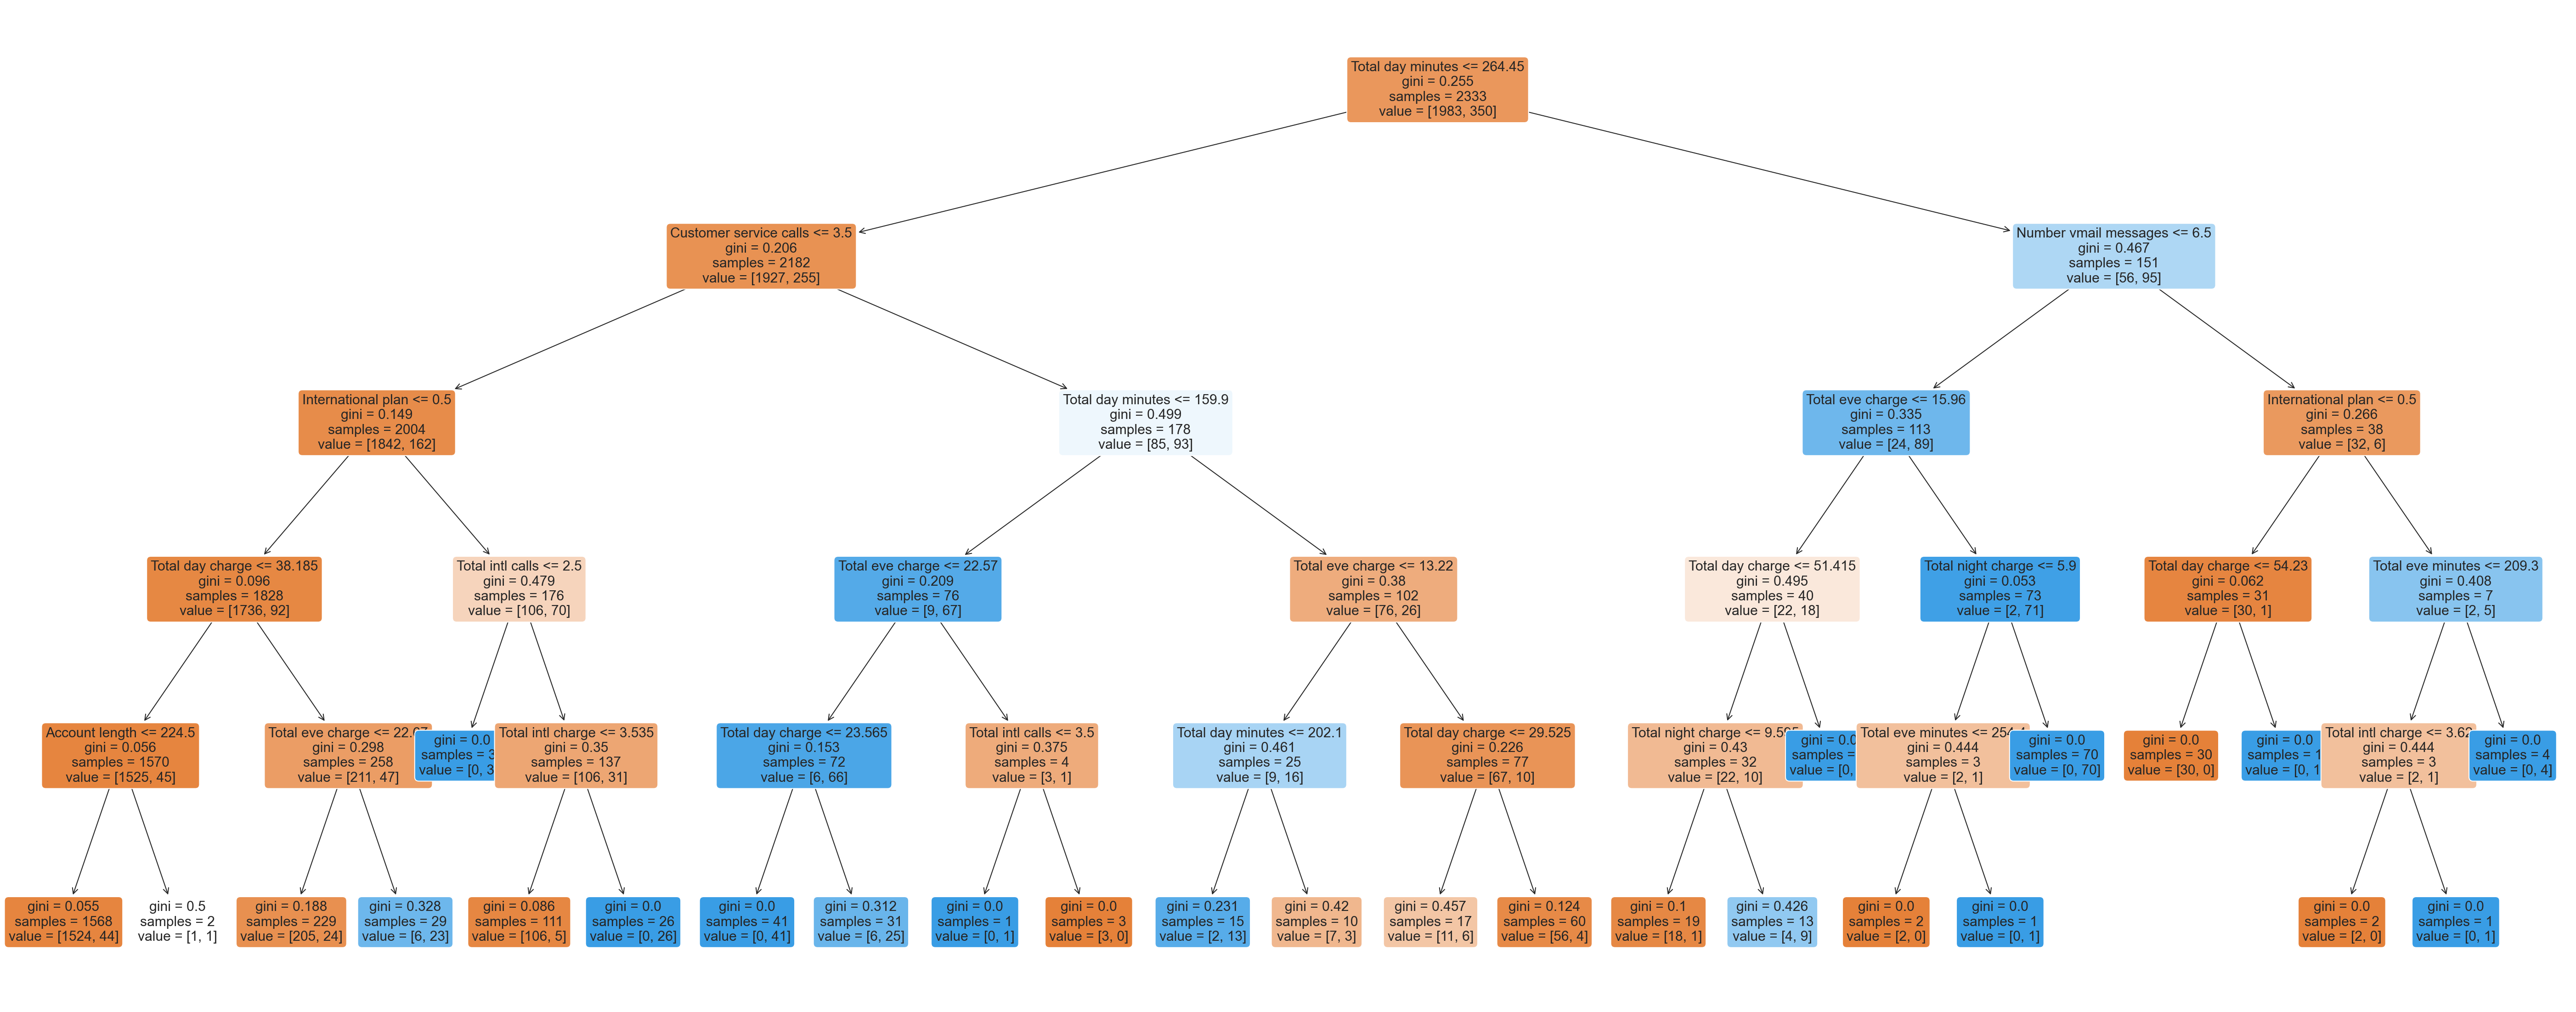

In [82]:
plt.figure(figsize=(50, 20))
tree.plot_tree(tre, filled=True, rounded=True,fontsize=15, feature_names=df.columns.to_list());

In [83]:
from sklearn.model_selection import GridSearchCV, cross_val_score

tree_params = {'max_depth' : range(1, 11), 'max_features' : range(4, 19)}
tree_grid = GridSearchCV(tre, tree_params, cv = 5, n_jobs = -1, verbose=True)

tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'max_features': range(4, 19)},
             verbose=True)

In [84]:
tree_grid.best_params_

{'max_depth': 6, 'max_features': 17}

In [85]:
tree_grid.best_score_

0.94257014456259

In [86]:
print(f"TreeGrid accuracy = {accuracy_score(tree_grid.predict(X_holdout), y_holdout)}")

TreeGrid accuracy = 0.946


[Text(0.6059322033898306, 0.9285714285714286, 'Total day minutes <= 264.45\ngini = 0.255\nsamples = 2333\nvalue = [1983, 350]\nclass = True'),
 Text(0.3686440677966102, 0.7857142857142857, 'Customer service calls <= 3.5\ngini = 0.206\nsamples = 2182\nvalue = [1927, 255]\nclass = True'),
 Text(0.22033898305084745, 0.6428571428571429, 'International plan <= 0.5\ngini = 0.149\nsamples = 2004\nvalue = [1842, 162]\nclass = True'),
 Text(0.13559322033898305, 0.5, 'Total day charge <= 38.185\ngini = 0.096\nsamples = 1828\nvalue = [1736, 92]\nclass = True'),
 Text(0.06779661016949153, 0.35714285714285715, 'Account length <= 224.5\ngini = 0.056\nsamples = 1570\nvalue = [1525, 45]\nclass = True'),
 Text(0.03389830508474576, 0.21428571428571427, 'Total eve charge <= 27.965\ngini = 0.055\nsamples = 1568\nvalue = [1524, 44]\nclass = True'),
 Text(0.01694915254237288, 0.07142857142857142, 'gini = 0.052\nsamples = 1560\nvalue = [1518, 42]\nclass = True'),
 Text(0.05084745762711865, 0.0714285714285714

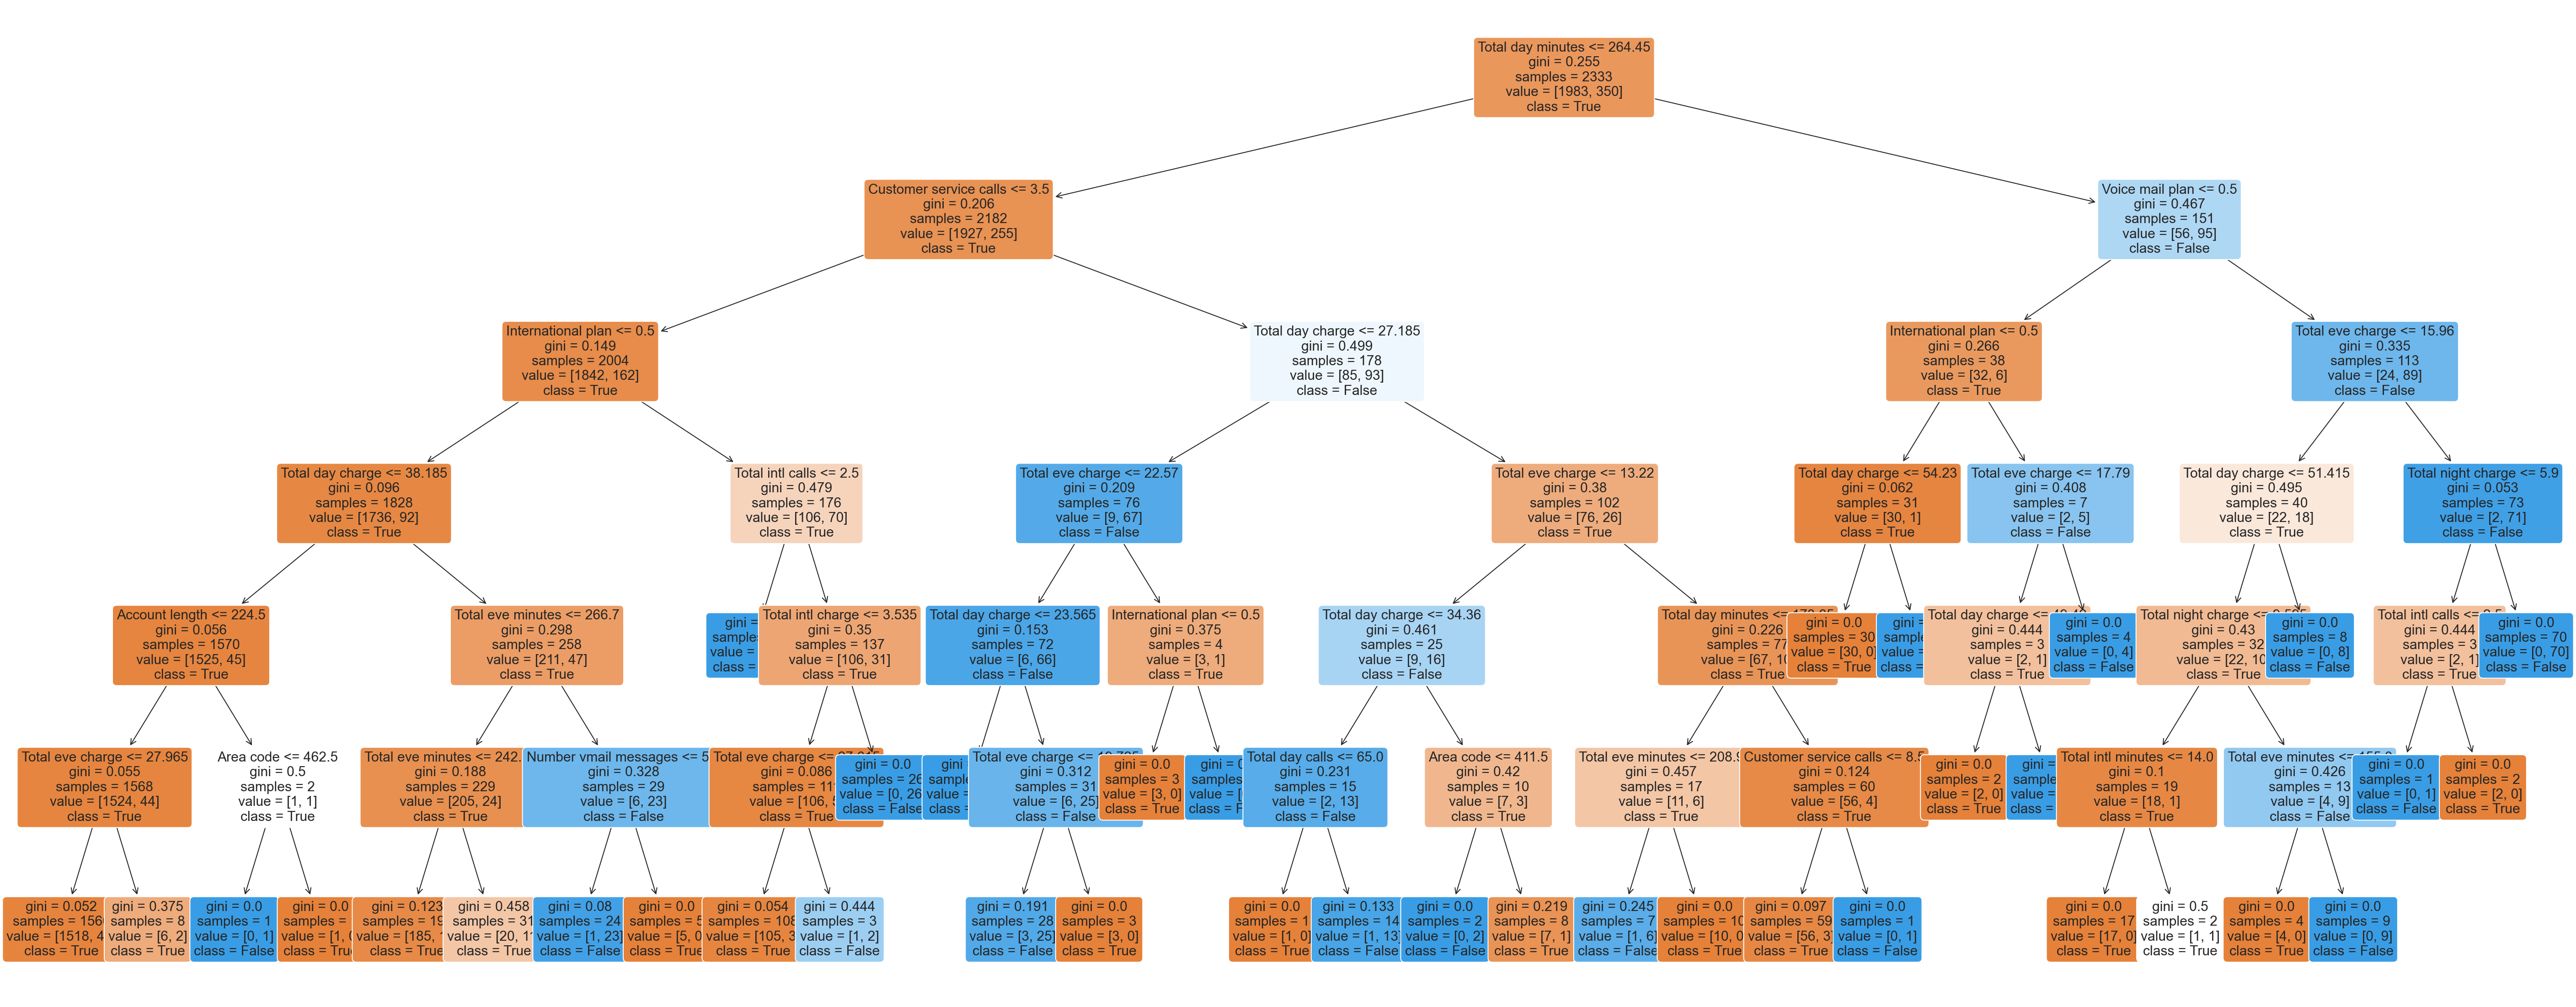

In [87]:
plt.figure(figsize=(50, 20))
tree.plot_tree(tree_grid.best_estimator_, filled=True, rounded=True, fontsize=15, class_names=["True", "False"], feature_names=df.columns)

In [89]:
from sklearn.pipeline import Pipeline
knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])
knn_params = {'knn__n_neighbors' : range(1, 10)}
knn_grid = GridSearchCV(knn_pipe, knn_params, cv = 5, n_jobs=-1, verbose=True)
knn_grid.fit(X_train_scaled, y_train)

knn_grid.best_params_, knn_grid.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


({'knn__n_neighbors': 7}, 0.8859867109023905)

In [91]:
print(f"KNNGrid accuracy = {accuracy_score(knn_grid.predict(X_holdout_scaled), y_holdout)}")

KNNGrid accuracy = 0.897


In [92]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=17)
print(np.mean(cross_val_score(forest, X_train, y_train, cv = 5)))

0.9494233119813256


In [93]:
forest_params = {'max_depth' : range(6, 12), 'max_features' : range(4, 19)}
forest_grid = GridSearchCV(forest, forest_params, cv = 5, n_jobs=-1, verbose=True)
forest_grid.fit(X_train, y_train)
forest_grid.best_params_, forest_grid.best_score_

Fitting 5 folds for each of 90 candidates, totalling 450 fits


({'max_depth': 9, 'max_features': 6}, 0.9511372931045574)

In [96]:
print(f"RandomForestGrid accuracy = {accuracy_score(forest_grid.predict(X_holdout), y_holdout)}")


RandomForestGrid accuracy = 0.953


In [97]:
def from_linear_separated_data(n = 500, x1_min = 0, x1_max = 30, x2_min = 0, x2_max = 30):
    data, target = [], []
    for i in range(n):
        x1 = np.random.randint(x1_min, x1_max)
        x2 = np.random.randint(x2_min, x2_max)
        if np.abs(x1 - x2) > 0.5:
            data.append([x1, x2])
            target.append(np.sign(x1 - x2))
    return np.array(data), np.array(target)

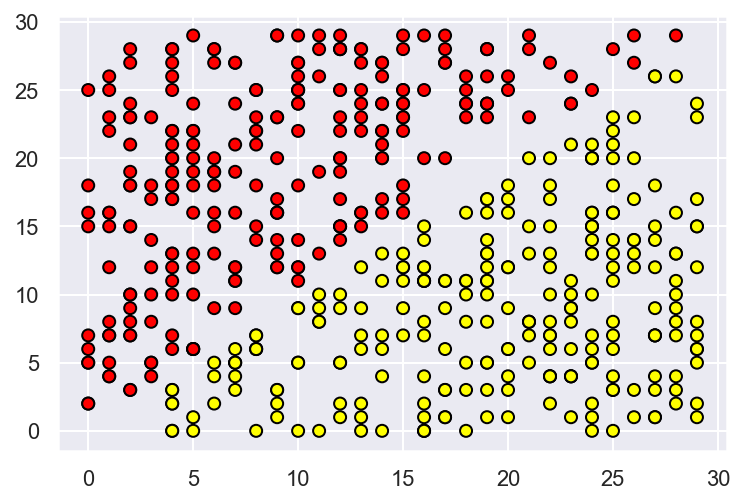

In [98]:
X, y = from_linear_separated_data()
plt.scatter(X[:, 0], X[:, 1], c = y, cmap='autumn', edgecolors='black')

In [110]:
tre = DecisionTreeClassifier(random_state=17).fit(X, y)
xx, yy = get_grid(X)
predicted = tre.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

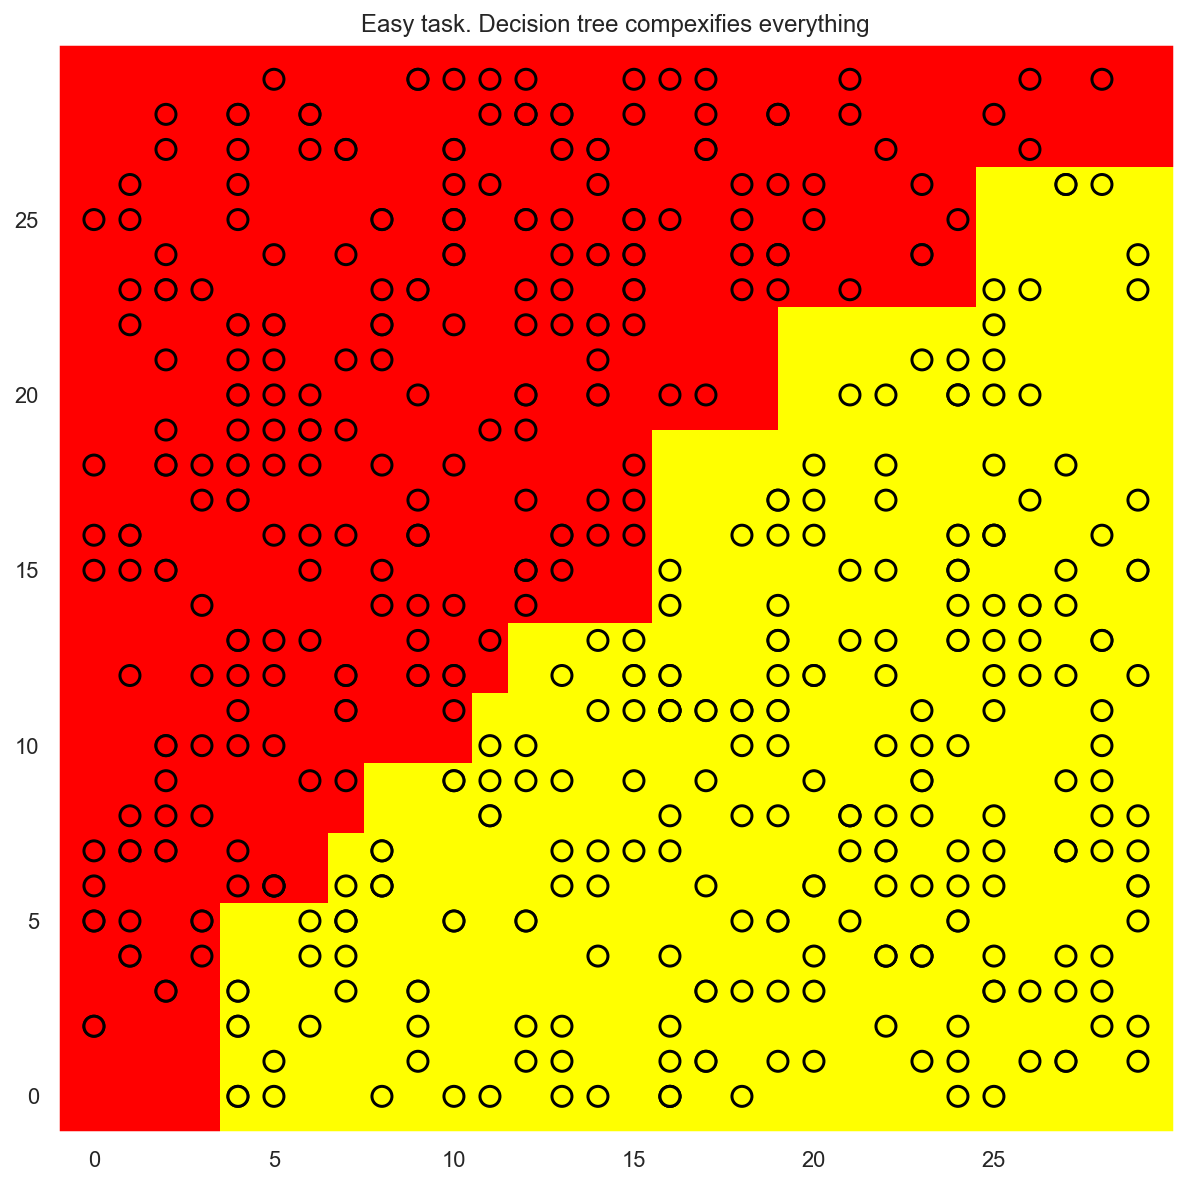

In [114]:
plt.figure(figsize=(10, 10))
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X[:, 0], X[:, 1], c = y, cmap='autumn', edgecolors='black', s = 100, lw = 1.5)
plt.title("Easy task. Decision tree compexifies everything");

[Text(0.5357142857142857, 0.9285714285714286, 'x1 <= 15.5\ngini = 0.5\nsamples = 481\nvalue = [240, 241]\nclass = 1'),
 Text(0.30952380952380953, 0.7857142857142857, 'x2 <= 9.5\ngini = 0.357\nsamples = 267\nvalue = [205, 62]\nclass = 0'),
 Text(0.14285714285714285, 0.6428571428571429, 'x1 <= 3.5\ngini = 0.462\nsamples = 83\nvalue = [30, 53]\nclass = 1'),
 Text(0.09523809523809523, 0.5, 'gini = 0.0\nsamples = 22\nvalue = [22, 0]\nclass = 0'),
 Text(0.19047619047619047, 0.5, 'x1 <= 6.5\ngini = 0.228\nsamples = 61\nvalue = [8, 53]\nclass = 1'),
 Text(0.09523809523809523, 0.35714285714285715, 'x2 <= 5.5\ngini = 0.475\nsamples = 18\nvalue = [7, 11]\nclass = 1'),
 Text(0.047619047619047616, 0.21428571428571427, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]\nclass = 1'),
 Text(0.14285714285714285, 0.21428571428571427, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]\nclass = 0'),
 Text(0.2857142857142857, 0.35714285714285715, 'x1 <= 7.5\ngini = 0.045\nsamples = 43\nvalue = [1, 42]\nclass = 1'),
 Text(0.

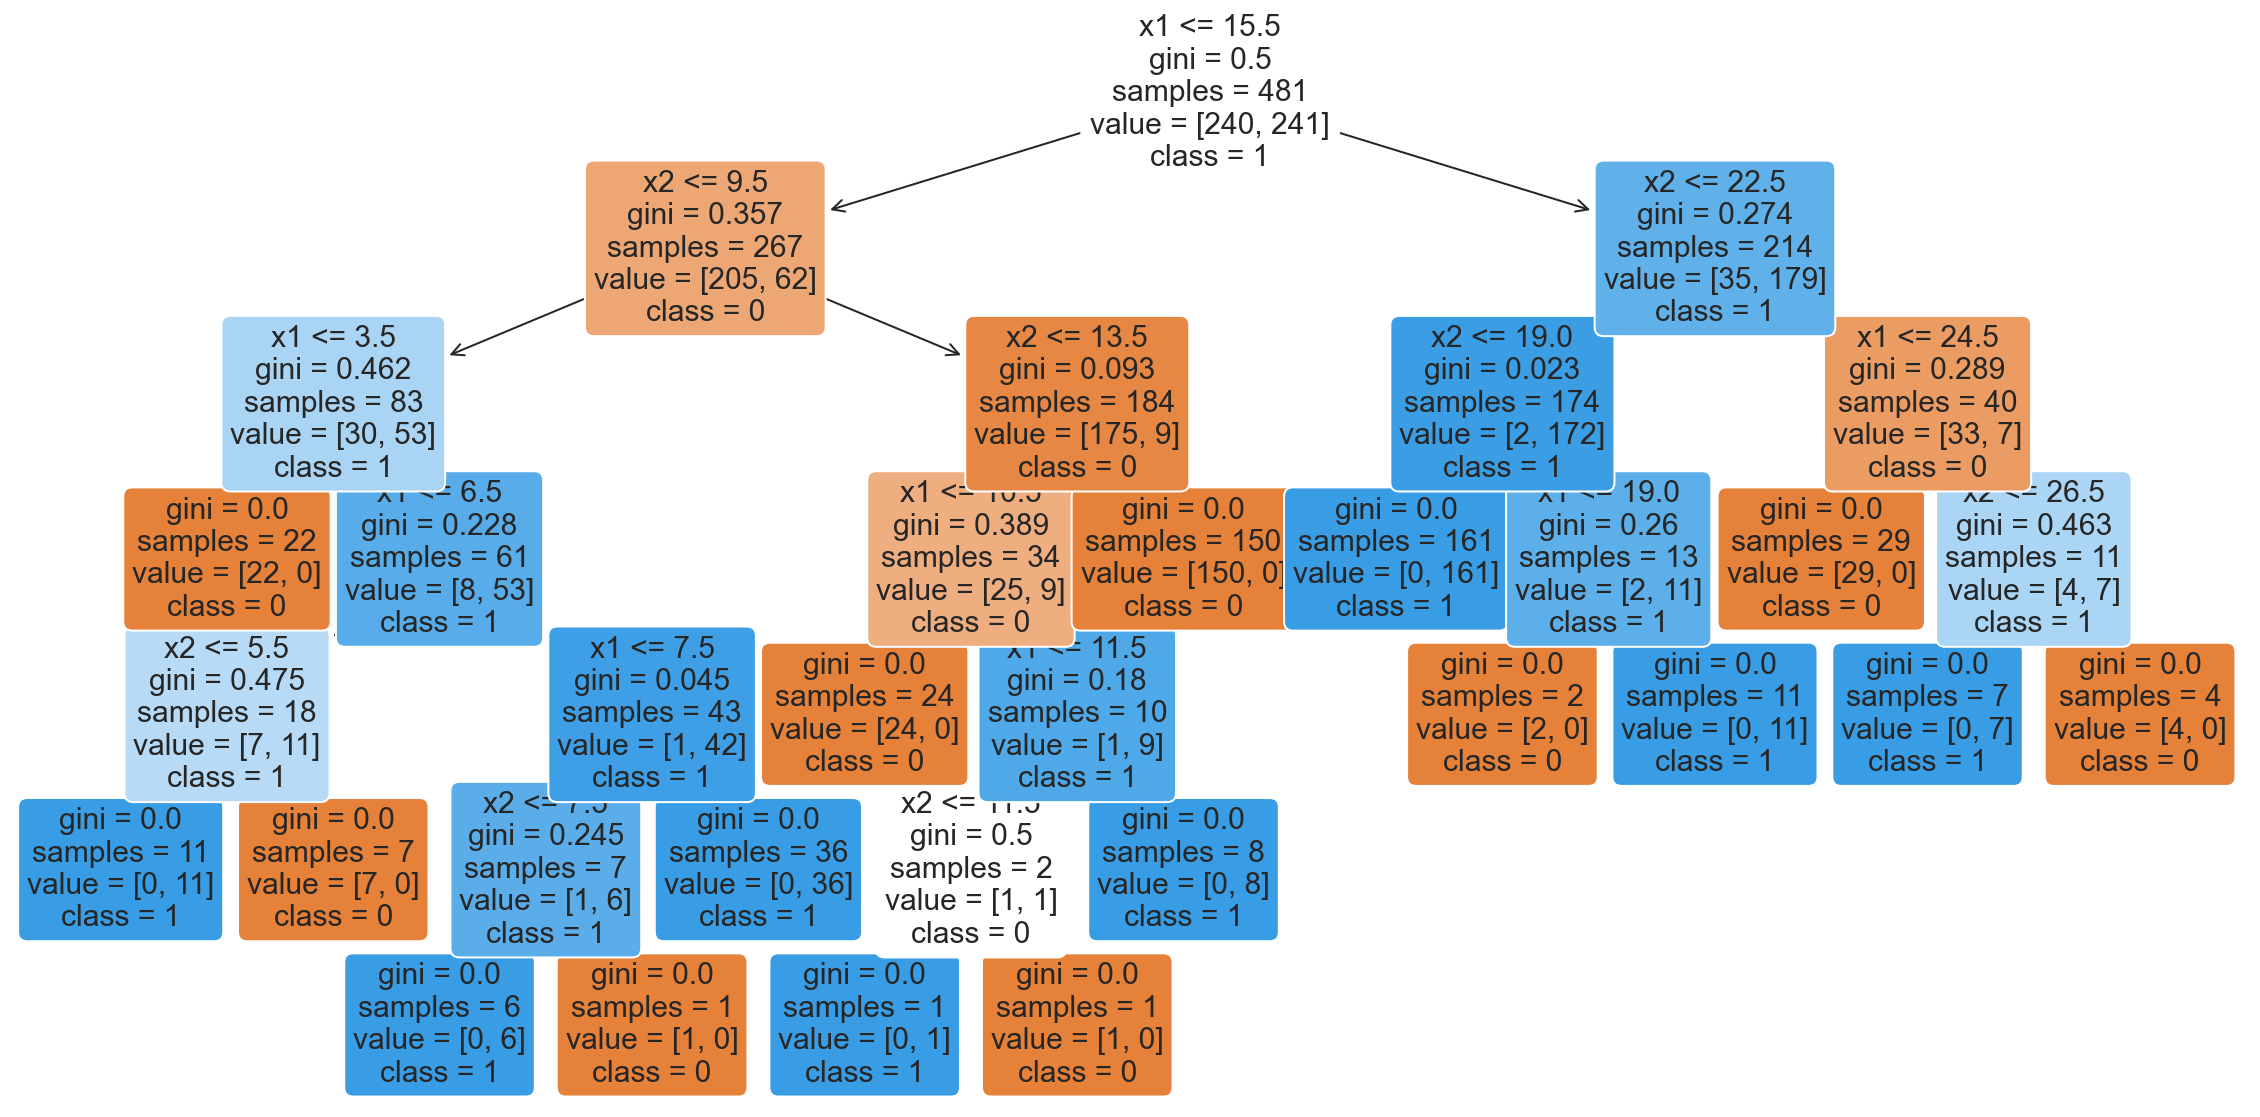

In [118]:
plt.figure(figsize=(20, 10))
tree.plot_tree(tre, feature_names=['x1', 'x2'], filled=True, rounded=True, fontsize=15, class_names=['0', '1'])

In [121]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X, y)

In [123]:
xx, yy = get_grid(X)
predicted = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

Text(0.5, 1.0, 'Easy task, kNN. Not bad')

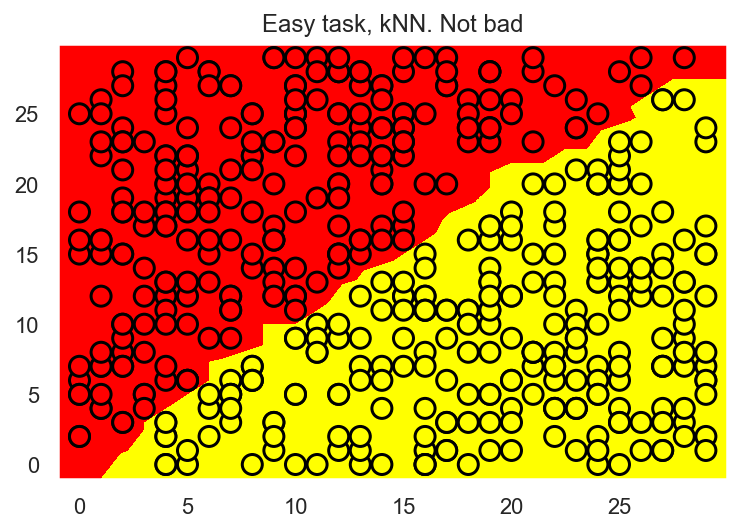

In [124]:
plt.pcolormesh(xx, yy, predicted, cmap="autumn")
plt.scatter(
    X[:, 0], X[:, 1], c=y, s=100, cmap="autumn", edgecolors="black", linewidth=1.5
)
plt.title("Easy task, kNN. Not bad")

In [125]:
from sklearn.datasets import load_digits
data = load_digits()
X = data.data
y = data.target

In [126]:
X[0,:].reshape([8,8])

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

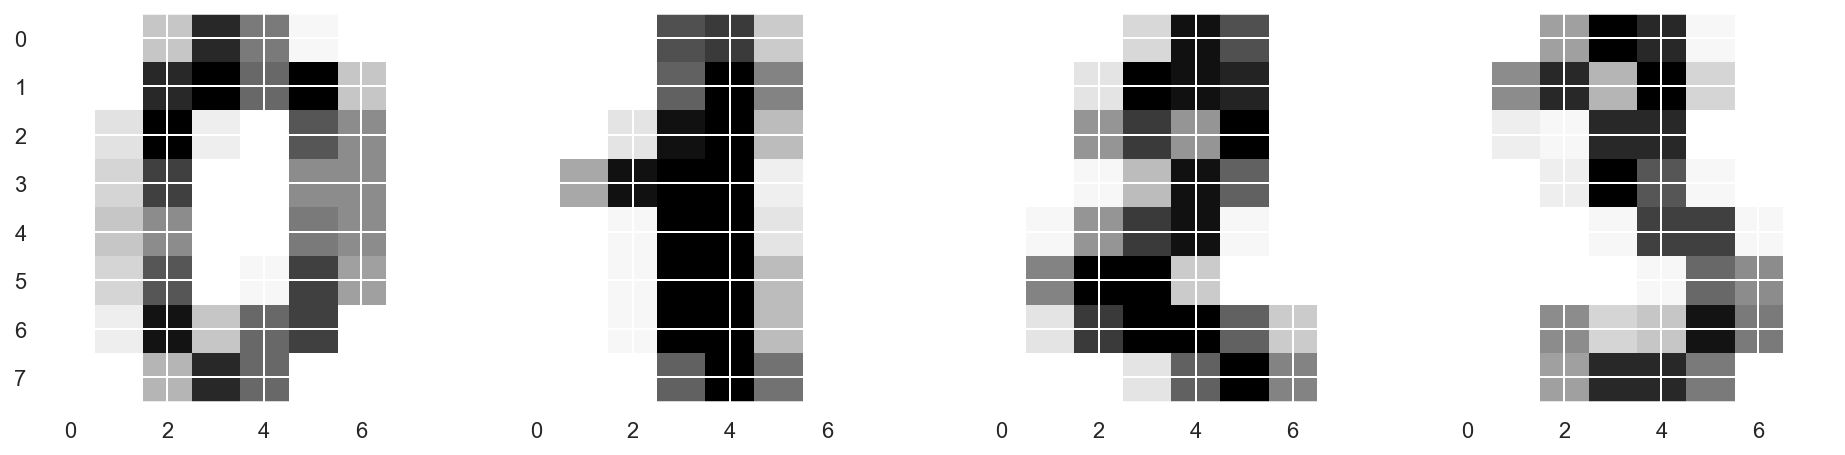

In [130]:
f, axes = plt.subplots(1, 4, sharey = True, figsize = (16, 6))
for i in range(4):
    axes[i].imshow(X[i,:].reshape([8, 8]), cmap = 'Greys')

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)


In [137]:
tre = DecisionTreeClassifier(max_depth=5, random_state=17)
tre.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=17)

In [138]:
knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=10))])
knn_pipe.fit(X_train, y_train) 

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=10))])

In [139]:
tree_pred = tre.predict(X_test)
knn_pred = knn_pipe.predict(X_test)

print(f"DecisionTree accuracy = {accuracy_score(tree_pred, y_test)}")
print(f"KNN accuracy = {accuracy_score(knn_pred, y_test)}")

DecisionTree accuracy = 0.6666666666666666
KNN accuracy = 0.975925925925926


In [140]:
tree_params = {'max_depth' : [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64], "max_features": [1, 2, 3, 5, 10, 20, 30, 50, 64]}

tree_grid = GridSearchCV(tre, tree_params, cv = 5, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
                         'max_features': [1, 2, 3, 5, 10, 20, 30, 50, 64]},
             verbose=True)

In [141]:
tree_grid.best_params_, tree_grid.best_score_

({'max_depth': 10, 'max_features': 50}, 0.8568203376968316)

In [142]:
np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=1), X_train, y_train, cv = 5))

0.9864858028204642

In [143]:
np.mean(cross_val_score(RandomForestClassifier(random_state=17), X_train, y_train, cv = 5))

0.9753462341111744

In [144]:
def form_noisy_data(n_obj=1000, n_feat=100, random_seed=17):
    np.seed = random_seed
    y = np.random.choice([-1, 1], size=n_obj)

    # first feature is proportional to target
    x1 = 0.3 * y

    # other features are noise

    x_other = np.random.random(size=[n_obj, n_feat - 1])

    return np.hstack([x1.reshape([n_obj, 1]), x_other]), y


X, y = form_noisy_data()

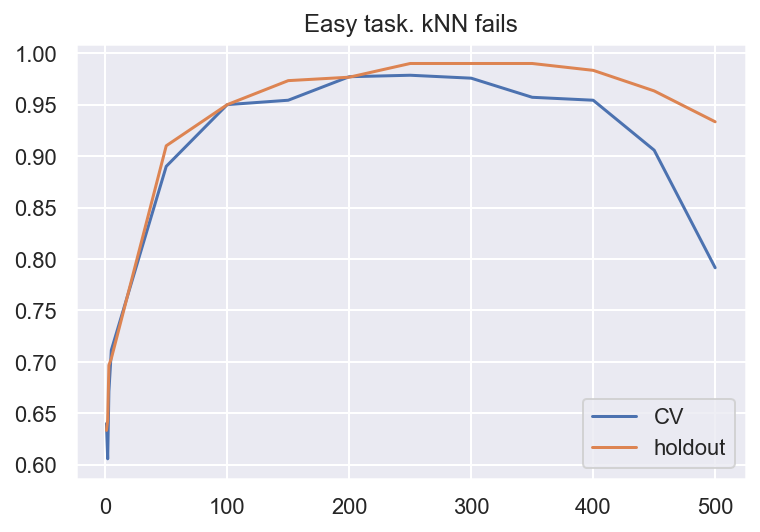

In [145]:
X_train, X_holdout, y_train, y_holdout = train_test_split(
    X, y, test_size=0.3, random_state=17
)

from sklearn.model_selection import cross_val_score

cv_scores, holdout_scores = [], []
n_neighb = [1, 2, 3, 5] + list(range(50, 550, 50))

for k in n_neighb:

    knn_pipe = Pipeline(
        [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))]
    )
    cv_scores.append(np.mean(cross_val_score(knn_pipe, X_train, y_train, cv=5)))
    knn_pipe.fit(X_train, y_train)
    holdout_scores.append(accuracy_score(y_holdout, knn_pipe.predict(X_holdout)))

plt.plot(n_neighb, cv_scores, label="CV")
plt.plot(n_neighb, holdout_scores, label="holdout")
plt.title("Easy task. kNN fails")
plt.legend();

In [151]:
tre = DecisionTreeClassifier(random_state=17, max_depth=1)
tree_cv_score = np.mean(cross_val_score(tre, X_train, y_train, cv=5))
tre.fit(X_train, y_train)
tree_holdout_score = accuracy_score(y_holdout, tre.predict(X_holdout))
print("Decision tree. CV: {}, holdout: {}".format(tree_cv_score, tree_holdout_score))

Decision tree. CV: 1.0, holdout: 1.0


[Text(0.5, 0.75, 'x[0] <= 0.0\ngini = 0.5\nsamples = 700\nvalue = [342, 358]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 342\nvalue = [342, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 358\nvalue = [0, 358]')]

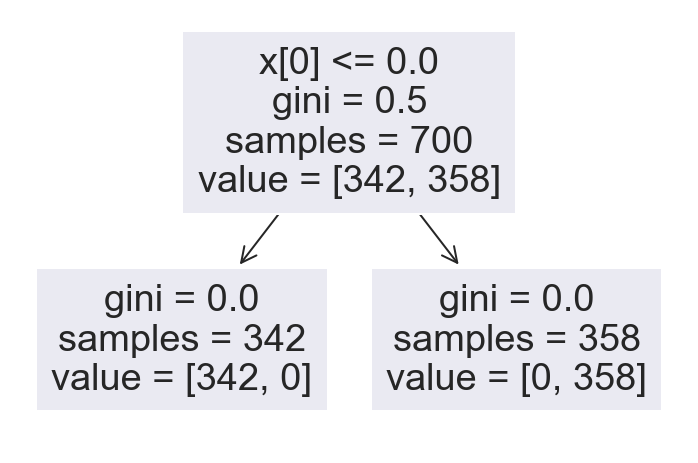

In [154]:
tree.plot_tree(tre)